In [1]:
#Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

In [3]:
#Import files
os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_1_week_mixed")

extension = 'csv'

#User trips
user_filenames =[i for i in glob.glob('people_trips_*.{}'.format(extension))]

#Food rips
food_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]

In [5]:
numitems_people = len(user_filenames)
print('Num sims people: ', numitems_people)

numitems_food = len(food_filenames)
print('Num sims food: ', numitems_food)

Num sims people:  19
Num sims food:  13


In [6]:
# Concat all in one df  
df_total_food = []

for f in food_filenames:
 temp_f = pd.read_csv(f)
 df_total_food.append(temp_f)

In [7]:
# Concat all in one df  
df_total_user = []

for f in user_filenames:
 temp_f = pd.read_csv(f)
 df_total_user.append(temp_f)

In [13]:
print('Num of total days and trips per sim - Food')

for sim in df_total_food:
    print(sim['Day'].max()-sim['Day'].min() +1 , len(sim))

Num of total days and trips per sim - Food
7 30079
7 30079
7 30079
7 30079
7 30079
7 30079
7 30079
7 30079
7 30079
7 30079
7 30079
7 30079
7 30079


In [14]:
print('Num of total days and trips per sim - Users')

for sim in df_total_user:
    print(sim['Day'].max()-sim['Day'].min() +1 , len(sim))

Num of total days and trips per sim - Users
7 14267
7 14323
7 14245
7 14278
7 14245
7 14279
7 14212
7 14272
7 14216
7 14145
7 14246
7 14179
7 14227
7 14236
7 14215
7 14293
7 14223
7 14265
7 14246


In [41]:
#Served trips and wait times - FOOD
i =0 

column_names= ['Avg_wait', 'Min_wait', 'Max_wait', 'Wait_stdv', 'Q10', 'Q50','Q90']
wait_food = pd.DataFrame(columns=column_names)

served_food = pd.DataFrame(columns=['Served_pct'])


for sim_food in df_total_food:
  
  #Compute aveage wait 
  temp_p_served= sim_food.loc[sim_food['Trip Served']==True]
  sum=temp_p_served['Wait Time (min)'].sum()
  len=temp_p_served['Wait Time (min)'].size
  average_wait_p=sum/len

  #Compute max, min and stdev wait
  min_wait =  temp_p_served['Wait Time (min)'].min()
  max_wait =  temp_p_served['Wait Time (min)'].max()
  stdev_wait = temp_p_served['Wait Time (min)'].std()

  #Percentiles
  q10= temp_p_served['Wait Time (min)'].quantile(0.1)
  q50= temp_p_served['Wait Time (min)'].quantile(0.5)
  q90=temp_p_served['Wait Time (min)'].quantile(0.9)

  #Compute percentage of served trips
  count_served=sim_food.loc[sim_food['Trip Served']==True].shape[0]
  count_unserved=sim_food.loc[sim_food['Trip Served']==False].shape[0]
  pct_served_p=(count_served)/(count_served+count_unserved)*100

  #Save
  wait_food = wait_food.append(pd.Series([average_wait_p, min_wait, max_wait, stdev_wait, q10, q50, q90], index=column_names), ignore_index=True)
  served_food = served_food.append(pd.Series(pct_served_p, index=['Served_pct']),ignore_index=True) 

  i+=1


print('Wait times')
print(wait_food)

print('Served trips')
print(served_food)

Wait times
    Avg_wait  Min_wait   Max_wait  Wait_stdv       Q10       Q50        Q90
0   5.159431       0.1  39.966667   4.446676  1.233333  3.966667  10.133333
1   5.116553       0.1  40.300000   4.360503  1.233333  3.966667  10.066667
2   5.166894       0.1  40.633333   4.463886  1.233333  3.966667  10.100000
3   5.138530       0.1  40.433333   4.447993  1.200000  3.966667  10.000000
4   5.135666       0.1  39.900000   4.395731  1.200000  3.966667  10.100000
5   5.147332       0.1  40.400000   4.431312  1.200000  3.966667  10.100000
6   5.151822       0.1  40.900000   4.403937  1.233333  3.966667  10.200000
7   5.177122       0.1  40.266667   4.428571  1.233333  3.966667  10.200000
8   5.135898       0.1  39.833333   4.357752  1.233333  3.966667  10.033333
9   5.114203       0.1  39.533333   4.339641  1.233333  3.966667  10.000000
10  5.161474       0.1  40.866667   4.374433  1.200000  4.000000  10.133333
11  5.165822       0.1  40.300000   4.412805  1.233333  4.000000  10.100000
1

In [43]:
#Served trips and wait times - USERS
i =0 

column_names= ['Avg_wait', 'Min_wait', 'Max_wait', 'Wait_stdv', 'Q10', 'Q50','Q90']
wait_user = pd.DataFrame(columns=column_names)

served_user = pd.DataFrame(columns=['Served_pct'])

for sim_user in df_total_user:
  
  #Compute aveage wait 
  temp_p_served= sim_user.loc[sim_user['Trip Served']==True]
  sum=temp_p_served['Wait Time (min)'].sum()
  len=temp_p_served['Wait Time (min)'].size
  average_wait_p=sum/len

  #Compute max, min and stdev wait
  min_wait =  temp_p_served['Wait Time (min)'].min()
  max_wait =  temp_p_served['Wait Time (min)'].max()
  stdev_wait = temp_p_served['Wait Time (min)'].std()

  #Percentiles
  q10= temp_p_served['Wait Time (min)'].quantile(0.1)
  q50= temp_p_served['Wait Time (min)'].quantile(0.5)
  q90=temp_p_served['Wait Time (min)'].quantile(0.9)

  #Compute percentage of served trips
  count_served=sim_user.loc[sim_user['Trip Served']==True].shape[0]
  count_unserved=sim_user.loc[sim_user['Trip Served']==False].shape[0]
  pct_served_p=(count_served)/(count_served+count_unserved)*100

  #Save
  wait_user = wait_user.append(pd.Series([average_wait_p, min_wait, max_wait, stdev_wait, q10,q50,q90], index=column_names), ignore_index=True)
  served_user = served_user.append(pd.Series(pct_served_p, index=['Served_pct']),ignore_index=True) 

  i+=1


print('Wait times')
print(wait_user)

print('Served trips')
print(served_user)

Wait times
    Avg_wait  Min_wait   Max_wait  Wait_stdv       Q10       Q50       Q90
0   4.060849       0.1  19.566667   2.866549  0.966667  3.366667  8.033333
1   4.078047       0.1  17.966667   2.869988  0.933333  3.433333  8.066667
2   4.040854       0.1  17.600000   2.871162  0.933333  3.366667  8.066667
3   4.056805       0.1  17.100000   2.858171  0.966667  3.366667  8.033333
4   4.097587       0.1  17.600000   2.907605  0.966667  3.400000  8.133333
5   4.094367       0.1  16.666667   2.900160  0.933333  3.400000  8.133333
6   4.060822       0.1  19.966667   2.864814  0.966667  3.400000  8.033333
7   4.074358       0.1  19.466667   2.874307  0.966667  3.400000  8.033333
8   4.064695       0.1  16.000000   2.855877  0.933333  3.400000  8.033333
9   4.058044       0.1  18.966667   2.875478  0.966667  3.366667  8.033333
10  4.070780       0.1  16.666667   2.854893  0.966667  3.400000  7.966667
11  4.060051       0.1  19.966667   2.859701  0.966667  3.400000  8.033333
12  4.056941  

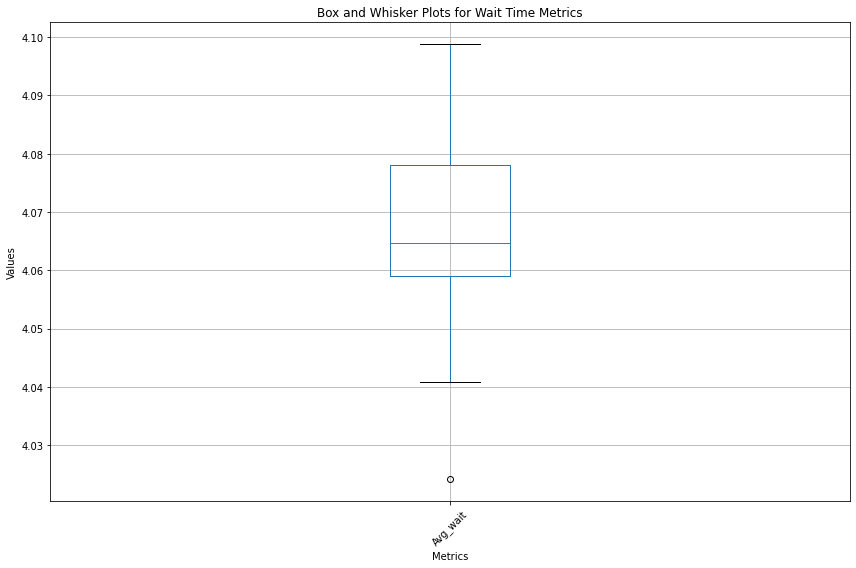

In [49]:
# Set the columns you want to include in the plot
columns_to_plot = ['Avg_wait']

# Create a box and whisker plot for each row
plt.figure(figsize=(12, 8))
wait_user[columns_to_plot].boxplot()

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Box and Whisker Plots for Wait Time Metrics')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set y-axis limits to include zero
#
# plt.ylim(bottom=0)

# Show the plot
plt.grid(True)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [32]:
#Calculate averages 

#Food 
avg=wait_food['Avg_wait'].mean()
avg_std= wait_food['Wait_stdv'].mean()
pct_served = served_food['Served_pct'].mean()
#q10= wait_food['Avg_wait'].quantile(0.1)
#q90= wait_food['Avg_wait'].quantile(0.9)

print('Food avg wait: ', avg)
print('Food wait stdev: ', avg_std)
print('Food served: ', pct_served)

#User
avg=wait_user['Avg_wait'].mean()
avg_std= wait_user['Wait_stdv'].mean()
pct_served = served_user['Served_pct'].mean()
print('User avg wait: ', avg)
print('User wait stdev: ', avg_std)
print('User served: ', pct_served)


Food avg wait:  5.14480986393949
Food wait stdev:  4.400709136529953
Food served:  100.0
User avg wait:  4.06750983048627
User wait stdev:  2.8759746035611697
User served:  100.0


In [51]:
df_total_user[1].head()

,Cycle,Day,Time,NumBikes,Battery,AutDrivingSpeed,MaxBiddingTime,PackBidCt,PackBidDist,PackBidQueue,...,Trip Served,Wait Time (min),Departure Time,Arrival Time,Duration (min),Origin [lat],Origin [lon],Destination [lat],Destination [lon],Distance (m)
0,2105,7,01:10:10,3,70000.0,8.0,0,100.0,0.01,2.0,...,True,1.266667,01:03:18,01:10:10,6.866667,-71.092771,42.359530,-71.094506,42.367050,1267.813274
1,2408,7,01:20:16,4,70000.0,8.0,0,100.0,0.01,2.0,...,True,0.466667,01:08:30,01:20:16,11.766667,-71.100359,42.365752,-71.084082,42.369789,2029.238932
2,2414,7,01:20:28,4,70000.0,8.0,0,100.0,0.01,2.0,...,True,3.366667,01:04:24,01:20:28,16.066667,-71.112190,42.378225,-71.085000,42.371912,2720.367357
3,2733,7,01:31:06,4,70000.0,8.0,0,100.0,0.01,2.0,...,True,0.400000,01:16:26,01:31:06,14.666667,-71.103395,42.361522,-71.079344,42.365714,2465.467855
4,3620,7,02:00:40,4,70000.0,8.0,0,100.0,0.01,2.0,...,True,8.500000,01:47:32,02:00:40,13.133333,-71.077975,42.367067,-71.098748,42.360846,2248.165693


In [70]:

# Create a list of your dataframes
dataframes = df_total_user # Replace with your actual dataframes

# Combine all dataframes into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Convert 'Time' column to datetime format
combined_df['Time'] = pd.to_datetime(combined_df['Time'])

# Extract day and hour from the 'Time' column
#combined_df['Day'] = combined_df['Time'].dt.day
combined_df['Hour'] = combined_df['Time'].dt.hour

# Function to calculate quantiles
def calculate_quantiles(series):
    return {
        'Q25': series.quantile(0.25),
        'Q50': series.median(),
        'Q75': series.quantile(0.75)
    }

# Calculate quantiles for each group of day and hour
grouped = combined_df.groupby(['Day', 'Hour'])['Wait Time (min)'].apply(calculate_quantiles).unstack()



In [71]:
grouped

Q25       Q50       Q75
Day Hour                              
7   1     0.466667  1.266667  3.366667
    2     3.750000  7.033333  9.100000
    3     2.866667  6.066667  7.233333
    5     0.366667  2.066667  8.100000
    6     3.866667  6.566667  8.233333
...            ...       ...       ...
13  19    1.700000  3.433333  5.400000
    20    1.933333  3.066667  4.500000
    21    1.500000  2.766667  4.433333
    22    1.400000  2.566667  4.500000
    23    1.758333  2.766667  4.000000

[163 rows x 3 columns]

In [100]:
grouped.dtypes

Q25    float64
Q50    float64
Q75    float64
dtype: object

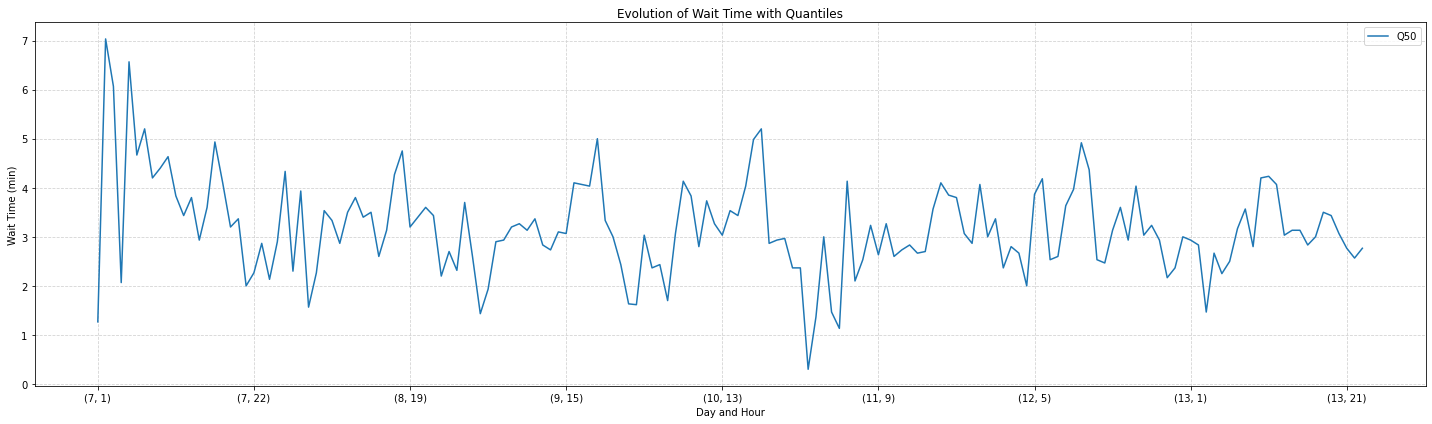

In [106]:
# Create a plot
plt.figure(figsize=(20, 6))

# Plot the quantiles
grouped['Q50'].plot(kind='line')

# Add labels and title
plt.xlabel('Day and Hour')
plt.ylabel('Wait Time (min)')
plt.title('Evolution of Wait Time with Quantiles')

# Add legend
plt.legend()

# Customize the grid
plt.grid(color='lightgray', linestyle='--')

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [116]:
df_total_user

[        Cycle  Day      Time  NumBikes  Battery  AutDrivingSpeed  \
 0        2105    7  01:10:10         3  70000.0              8.0   
 1        2408    7  01:20:16         4  70000.0              8.0   
 2        2414    7  01:20:28         4  70000.0              8.0   
 3        2733    7  01:31:06         4  70000.0              8.0   
 4        3620    7  02:00:40         4  70000.0              8.0   
 ...       ...  ...       ...       ...      ...              ...   
 14262  302128   13  23:50:56       402  70000.0              8.0   
 14263  302130   13  23:51:00       402  70000.0              8.0   
 14264  302229   13  23:54:18       402  70000.0              8.0   
 14265  302326   13  23:57:32       402  70000.0              8.0   
 14266  302349   13  23:58:18       402  70000.0              8.0   
 
        MaxBiddingTime  PackBidCt  PackBidDist  PackBidQueue  ...  Trip Served  \
 0                   0      100.0         0.01           2.0  ...         True   
 1    

In [119]:
# Create a DataFrame with one row every 15 minutes for 7 days
days = pd.Series(range(1, 8))
time_intervals = pd.date_range(start='00:00:00', end='23:59:59', freq='15Min')
index = pd.MultiIndex.from_product([days, time_intervals], names=['day', 'start_time_ed'])
df_food_slt= pd.DataFrame(index=index).reset_index()
df_user_slt= pd.DataFrame(index=index).reset_index()

In [120]:
df_food_slt

,day,start_time_ed
0,1,2023-08-28 00:00:00
1,1,2023-08-28 00:15:00
2,1,2023-08-28 00:30:00
3,1,2023-08-28 00:45:00
4,1,2023-08-28 01:00:00
...,...,...
667,7,2023-08-28 22:45:00
668,7,2023-08-28 23:00:00
669,7,2023-08-28 23:15:00
670,7,2023-08-28 23:30:00


In [124]:
# Set the index 
df_food_slt['x_datetime'] = df_food_slt['day'].astype(str) + ', ' + df_food_slt['start_time_ed'].dt.strftime('%H:%M:%S')

In [125]:
df_food_slt

,day,start_time_ed,x_datetime
0,1,2023-08-28 00:00:00,"1, 00:00:00"
1,1,2023-08-28 00:15:00,"1, 00:15:00"
2,1,2023-08-28 00:30:00,"1, 00:30:00"
3,1,2023-08-28 00:45:00,"1, 00:45:00"
4,1,2023-08-28 01:00:00,"1, 01:00:00"
...,...,...,...
667,7,2023-08-28 22:45:00,"7, 22:45:00"
668,7,2023-08-28 23:00:00,"7, 23:00:00"
669,7,2023-08-28 23:15:00,"7, 23:15:00"
670,7,2023-08-28 23:30:00,"7, 23:30:00"


In [126]:
# Set the index 
df_user_slt['x_datetime'] = df_user_slt['day'].astype(str) + ', ' + df_user_slt['start_time_ed'].dt.strftime('%H:%M:%S')

In [122]:
# Format the datetime columns
for sim_food in df_total_food:
    sim_food['Day'] = sim_food['Day'] - 6
    sim_food['start_time_ed'] = pd.to_datetime(sim_food['Time']).dt.floor('15Min')
    sim_food['Time_ed'] = sim_food['Day'].astype(str) + ', ' + sim_food['start_time_ed'].dt.strftime('%H:%M:%S')

for sim_user in df_total_user:
    sim_user['Day'] = sim_user['Day'] - 6
    sim_user['start_time_ed'] = pd.to_datetime(sim_user['Time']).dt.floor('15Min')
    sim_user['Time_ed'] = sim_user['Day'].astype(str) + ', ' + sim_user['start_time_ed'].dt.strftime('%H:%M:%S')

In [123]:
sim_food

,Cycle,Day,Time,NumBikes,Battery,AutDrivingSpeed,MaxBiddingTime,PackBidCt,PackBidDist,PackBidQueue,...,Departure Time,Arrival Time,Duration (min),Origin [lat],Origin [lon],Destination [lat],Destination [lon],Distance (m),start_time_ed,Time_ed
0,3162,1,01:45:24,4,70000.0,8.0,0,100.0,0.01,2.0,...,01:22:16,01:45:24,23.133333,-71.086885,42.372127,-71.120404,42.373081,3026.171381,2023-08-28 01:45:00,"1, 01:45:00"
1,5122,1,02:50:44,5,70000.0,8.0,0,100.0,0.01,2.0,...,02:45:48,02:50:44,4.933333,-71.120337,42.389247,-71.123773,42.392195,414.367283,2023-08-28 02:45:00,"1, 02:45:00"
2,5546,1,03:04:52,6,70000.0,8.0,0,100.0,0.01,2.0,...,02:55:54,03:04:52,8.966667,-71.117852,42.372484,-71.108024,42.373705,1125.743981,2023-08-28 03:00:00,"1, 03:00:00"
3,5704,1,03:10:08,6,70000.0,8.0,0,100.0,0.01,2.0,...,02:58:54,03:10:08,11.233333,-71.117852,42.372484,-71.109013,42.376793,1381.718435,2023-08-28 03:00:00,"1, 03:00:00"
4,6027,1,03:20:54,6,70000.0,8.0,0,100.0,0.01,2.0,...,03:14:48,03:20:54,6.100000,-71.090470,42.361649,-71.093845,42.357313,1052.808476,2023-08-28 03:15:00,"1, 03:15:00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30074,301018,7,23:13:56,420,70000.0,8.0,0,100.0,0.01,2.0,...,23:05:26,23:13:56,8.500000,-71.099375,42.372746,-71.089086,42.373422,1163.742522,2023-08-28 23:00:00,"7, 23:00:00"
30075,301155,7,23:18:30,420,70000.0,8.0,0,100.0,0.01,2.0,...,23:13:16,23:18:30,5.233333,-71.093880,42.362782,-71.100137,42.362183,613.596965,2023-08-28 23:15:00,"7, 23:15:00"
30076,301341,7,23:24:42,420,70000.0,8.0,0,100.0,0.01,2.0,...,23:14:18,23:24:42,10.400000,-71.119836,42.383291,-71.119940,42.372069,1333.445317,2023-08-28 23:15:00,"7, 23:15:00"
30077,301342,7,23:24:44,420,70000.0,8.0,0,100.0,0.01,2.0,...,23:22:00,23:24:44,2.733333,-71.101967,42.364027,-71.100137,42.362183,336.911963,2023-08-28 23:15:00,"7, 23:15:00"
